<h1>Projekt 1: Monte Carlo</h1>

<h3>Importowanie potrzebnych bibliotek </h3>

In [41]:
import random
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

<h3>Zdefiniowanie funkcji Monte Carlo</h3>

In [42]:
# tworzy randomowe współrzędne
def Draw_coordinates(n):

    x_random = []
    y_random = []
    for i in range(0, n):
        x_random.append( random.uniform(0, 1) )
        y_random.append( random.uniform(0, 1) )
        
    coordinates= pd.DataFrame({ "X" : x_random, "Y" : y_random })
    
    return coordinates
    
# szacuje wartość pi na podstawie otrzymanych punktów
def PI(coordinates):
    hitted = sum(  coordinates["X"] ** 2 + coordinates["Y"] ** 2 <= 1 )
    return hitted / len(coordinates) * 4
    
# łączy funkcje Draw_coordinates i PI
def Monte_Carlo(n):
    coo  = Draw_coordinates(n)
    pi = PI(coo)
    return pi

<h3>Testowanie funkcji</h3>

In [43]:
coordinates = Draw_coordinates(1000)
PI(coordinates)
Monte_Carlo(100)

3.32

<h3>Funkcje pomocnicze do wykresów obrazujących punkty</h3>

In [44]:
def within(coordinates):
    R = coordinates[ coordinates["X"] ** 2 + coordinates["Y"] ** 2 <= 1 ]
    return R

def outside(coordinates):
    R = coordinates[ coordinates["X"] ** 2 + coordinates["Y"] ** 2 > 1 ]
    return R

def plot_points(coors, numbers_of_points, ax):
    alfa = np.linspace(0, np.pi / 2, 100)
    x = np.cos(alfa)
    y = np.sin(alfa)
    
    tmp_within = within(coors)
    tmp_outside = outside(coors)
    ax.scatter(tmp_within["X"], tmp_within["Y"], s=np.log10(numbers_of_points)**(-1)/10*8, color='maroon')
    ax.scatter(tmp_outside["X"], tmp_outside["Y"], s=np.log10(numbers_of_points)**(-1)/10*8, color='cornflowerblue')
    ax.plot(x,y, color="gold")
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"{numbers_of_points} random points")

def plot_rms(points_rms_list, rms_list, axs, show_markers=False):
    if(show_markers):
        axs.plot(points_rms_list, rms_list, marker='o', linestyle='-', linewidth=0.8, markersize=3)
    else:
        axs.plot(points_rms_list, rms_list, linestyle='-', linewidth=0.8)
    axs.set_yscale("log")
    axs.set_xlabel("Iteracja")
    axs.set_ylabel("Błąd RMS")
    axs.set_title("Błąd RMS w każdej iteracji (skala logarytmiczna)")
    axs.grid(True)

def plot_bar(points_rms_list, n_symulations, axs):
    axs.bar(list(range(n_symulations)),points_rms_list, color ='rebeccapurple')
    axs.set_title('Liczba punktów w kolejnych symulacjach')
    axs.set_xlabel('Numer losowania')
    axs.set_ylabel('Liczba punktów')
    axs.grid(True, axis='y', alpha=0.75)
   

<h3>Wykresy</h3>

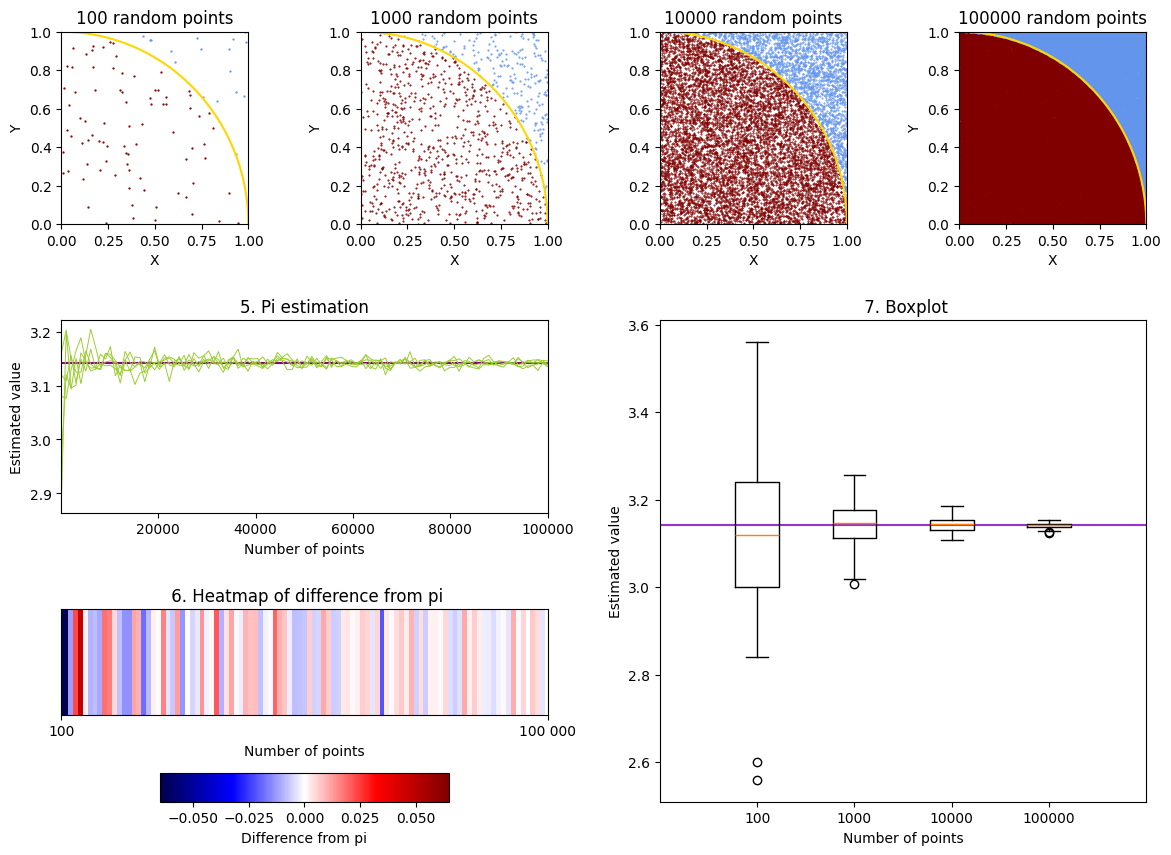

In [45]:
random.seed(12)

plt.figure(figsize=(14, 10))

numbers_of_points = [100, 1000, 10000, 100000]

# wykresy obrazujące punkty pod i nad wykresem
for i in range(len(numbers_of_points)):
    coors = Draw_coordinates( numbers_of_points[i])
    ax = plt.subplot(3, 4, i+1)
    plot_points(coors, numbers_of_points[i], ax)

# wykres obrazujący szacowną wartość pi podczas zwiekszania liczby strzałów
numbers_of_points_2 = np.linspace(100, 100000, 100).astype(int)

ax = plt.subplot2grid(shape=(3, 4), loc=(1, 0), colspan=2)

ax.plot([100, 100000], [np.pi, np.pi], color="darkmagenta")

for i in range(5):
    pi=[]
    for num in range( len( numbers_of_points_2 ) ):
        pi.append(Monte_Carlo(numbers_of_points_2[num]))
    ax.plot(numbers_of_points_2, pi, linewidth=0.7, color="yellowgreen")
    
ax.set_xlim([100, 100000])
ax.set_title("5. Pi estimation")
ax.set_xlabel('Number of points')
ax.set_ylabel('Estimated value')

# heatmap
ax = plt.subplot2grid(shape=(3, 4), loc=(2, 0), colspan=2)
START=0
array_pi = np.array(pi[START:])
array_pi = (array_pi - np.pi)

im = ax.imshow([array_pi],aspect="auto",  cmap='seismic', vmin=-np.max(np.abs(array_pi)), vmax=np.max(np.abs(array_pi)))
ax.set_xlim(0, len(pi)-START)
ax.set_xticks([0,len(pi)-START])
ax.set_xticklabels([f"{numbers_of_points_2[START]}", "100 000"])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_title(" 6. Heatmap of difference from pi")
ax.set_xlabel('Number of points')

cbar = plt.colorbar(im, ax=ax, aspect=10, orientation='horizontal', pad=0.3)
cbar.set_label('Difference from pi')
    
# boxplot
data_for_bplot=[]
for num in numbers_of_points:
    tmp=[]
    for i in range(100):
        tmp.append(Monte_Carlo(num))
    data_for_bplot.append(tmp)
    
ax = plt.subplot2grid(shape=(3, 4), loc=(1, 2), colspan=2, rowspan=2)

ax.hlines(np.pi, xmin=0, xmax=5, color='darkorchid')
bplot = ax.boxplot(data_for_bplot, vert=True, labels=numbers_of_points)
ax.set_xlim([0, 5])
ax.set_title(" 7. Boxplot")
ax.set_xlabel('Number of points')
ax.set_ylabel('Estimated value')

plt.subplots_adjust(hspace=0.5, wspace=0.6)
plt.show()


In [46]:

for i in [0,1,2,3]:
    print(f'ilość "strzałów": {numbers_of_points[i]}\nStatystyki:')
    print(f' min: {min(data_for_bplot[i])}', end='\t')
    print(f'lower cap: {bplot["caps"][i*2].get_ydata()[1]} ', end='\t')
    print(f'quantile 0.25: {bplot["boxes"][i].get_ydata()[1]} ', end='\t')
    print(f'median: {bplot["medians"][i].get_ydata()[1]} ', end='\t')
    print(f'quantile 0.75: {bplot["boxes"][i].get_ydata()[2]} ', end='\t')
    print(f'upper cap: {bplot["caps"][i*2+1].get_ydata()[1]} ', end='\t')
    print(f'max: {max(data_for_bplot[i])}')
    print("\n")

ilość "strzałów": 100
Statystyki:
 min: 2.56	lower cap: 2.84 	quantile 0.25: 3.0 	median: 3.12 	quantile 0.75: 3.24 	upper cap: 3.56 	max: 3.56


ilość "strzałów": 1000
Statystyki:
 min: 3.008	lower cap: 3.02 	quantile 0.25: 3.112 	median: 3.146 	quantile 0.75: 3.176 	upper cap: 3.256 	max: 3.256


ilość "strzałów": 10000
Statystyki:
 min: 3.1072	lower cap: 3.1072 	quantile 0.25: 3.1316 	median: 3.1448 	quantile 0.75: 3.154 	upper cap: 3.1868 	max: 3.1868


ilość "strzałów": 100000
Statystyki:
 min: 3.12416	lower cap: 3.1294 	quantile 0.25: 3.13843 	median: 3.14168 	quantile 0.75: 3.14507 	upper cap: 3.1542 	max: 3.1542




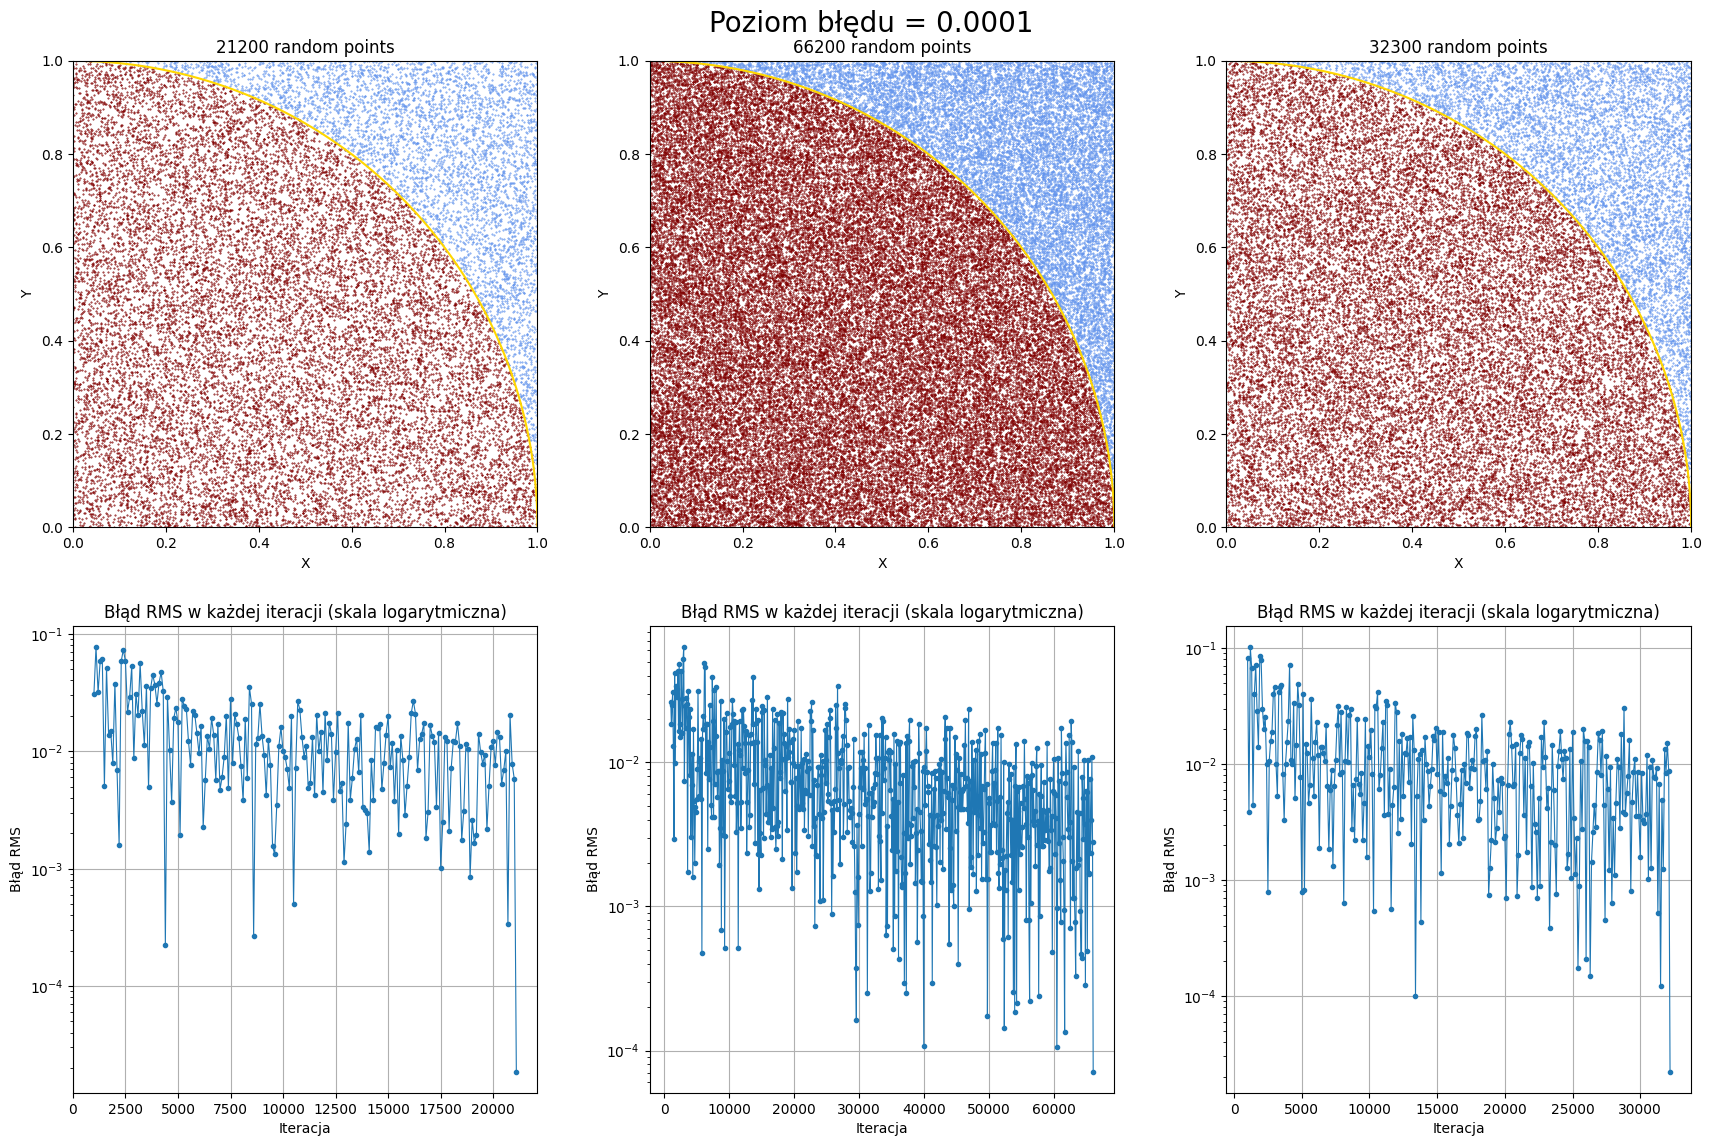

In [47]:
inaccuracy = 0.0001

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.tight_layout(pad=5)

for i in range(3):
    numbers_of_points = 1000
    rms_list = []
    points_rms_list = []
    rms =  1
    while rms>inaccuracy:
        coors = Draw_coordinates(numbers_of_points)
        pi_estimate = PI(coors)
        rms = np.sqrt((pi_estimate - np.pi)**2)
        points_rms_list.append(numbers_of_points)
        rms_list.append(rms)
        numbers_of_points+=100
    plot_points(coors, numbers_of_points, axs[0, i])
    plot_rms(points_rms_list, rms_list, axs[1,i], True)

fig.suptitle(f"Poziom błędu = {inaccuracy}", fontsize=20)
plt.show()

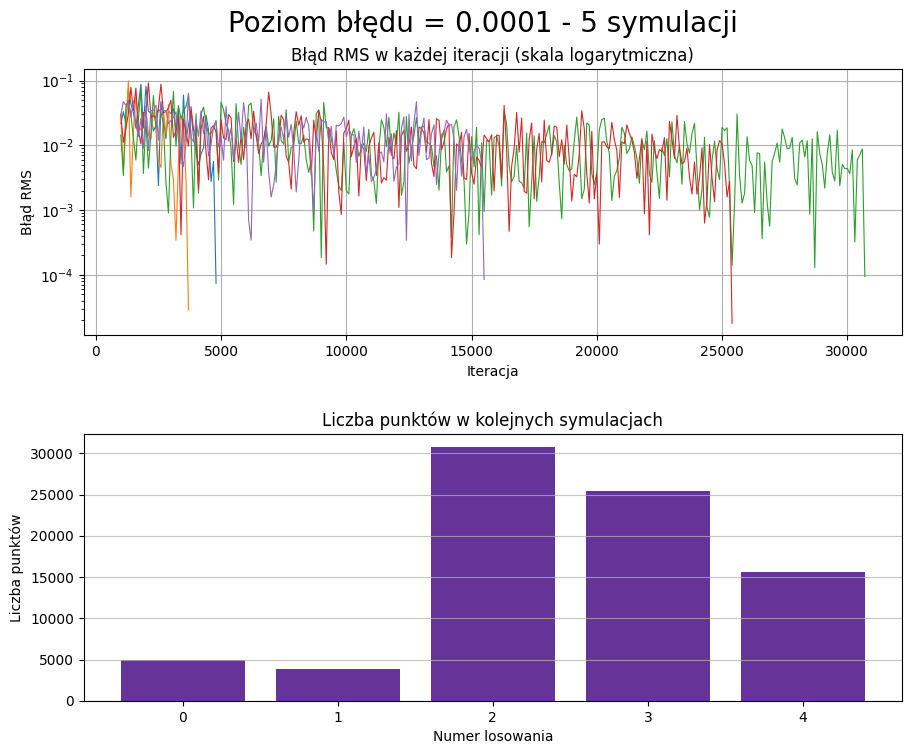

In [48]:
n_symulations = 5
inaccuracy = 0.0001
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.tight_layout(pad=5)

list_num_points = []
for _ in range(n_symulations):
    rms_list = []
    points_rms_list = []
    numbers_of_points = 1000
    rms = 1
    while rms>inaccuracy:
        coors = Draw_coordinates(numbers_of_points)
        pi_estimate = PI(coors)
        rms = np.sqrt((pi_estimate - np.pi)**2)
        points_rms_list.append(numbers_of_points)
        rms_list.append(rms)
        numbers_of_points+=100
    list_num_points.append(numbers_of_points)
    plot_rms(points_rms_list, rms_list, axs[0])

plot_bar(list_num_points, n_symulations, axs[1])

fig.suptitle(f"Poziom błędu = {inaccuracy} - {n_symulations} symulacji", fontsize=20)
plt.show()

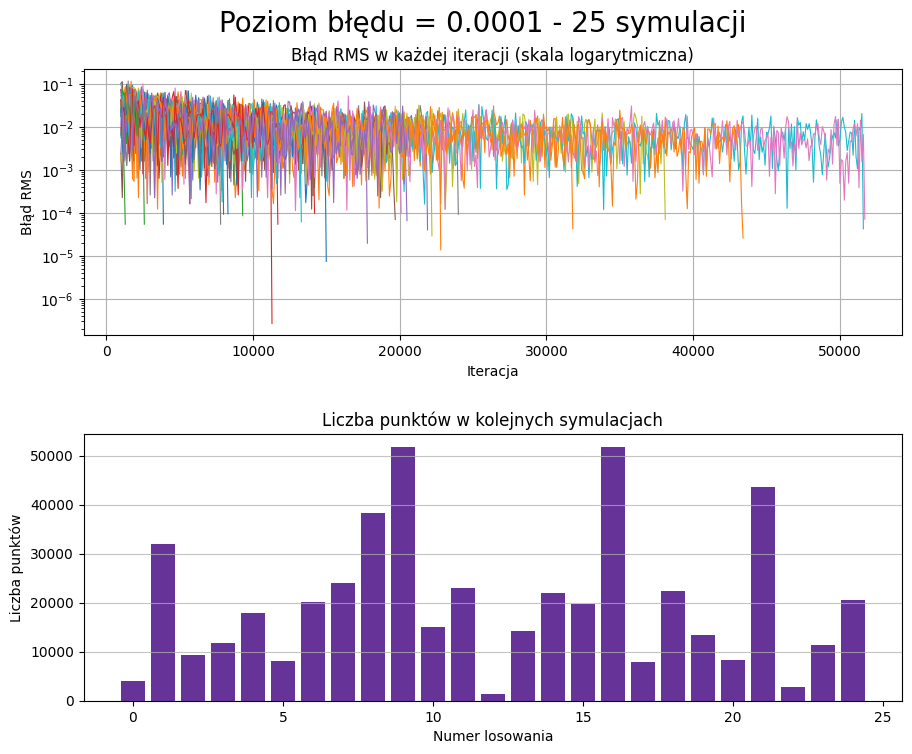

In [49]:
n_symulations = 25
inaccuracy = 0.0001
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.tight_layout(pad=5)

list_num_points = []
for _ in range(n_symulations):
    rms_list = []
    points_rms_list = []
    numbers_of_points = 1000
    rms = 1
    while rms>inaccuracy:
        coors = Draw_coordinates(numbers_of_points)
        pi_estimate = PI(coors)
        rms = np.sqrt((pi_estimate - np.pi)**2)
        points_rms_list.append(numbers_of_points)
        rms_list.append(rms)
        numbers_of_points+=100
    list_num_points.append(numbers_of_points)
    plot_rms(points_rms_list, rms_list, axs[0])

plot_bar(list_num_points, n_symulations, axs[1])

fig.suptitle(f"Poziom błędu = {inaccuracy} - {n_symulations} symulacji", fontsize=20)
plt.show()

<h3>Opis Algorytmu Monte Carlo</h3>

<h5>Algorytm Monte Carlo używany do oszacowania liczby pi polega na losowaniu 
punktów w kwadracie jednostkowym i sprawdzaniu ile z nich znajduje się wewnątrz 
ćwiartki koła wpisanego w ten kwadrat. Stosunek liczby punktów w tym kole do liczby wszystkich losowych punktów pomnożony przez cztery daje nam szacowaną
wartość liczby pi.</h5>

<h3>Opis napisanych funkcji</h3>

<h5>Draw_coordinates(n) - Generuje n losowych współrzędnych (x, y) w przedziale [0, 1]</h5>
<h5>PI(coordinates) - Przyjmuje zbiór współrzędnych i zwraca estymowaną wartość liczby 
pi na podstawie punktów znajdujących się w kole jednostkowym</h5>
<h5>Monte_Carlo(n) - Łączy powyższe funkcje</h5>
<h5>within(coordinates) - Zwraca punkty znajdujące się wewnątrz koła jednostkowego</h5>
<h5>outside(coordinates) - Zwraca punkty znajdujące się poza kołem jednostkowym </h5>


<h3>Opis wykresów</h3>

<h5>Pierwsze 4 wykresy pokazują losowo wygenerowane punkty na wykresie. Kolorem czerwonym oznaczone są punkty położone wewnątrz ćwiartki koła i na jej obwodzie, a niebieskim te które leżą po za jej granicami. Widzimy, że wraz ze wzrostem nasza ćwiartka jest wypełniona coraz bardziej.</h5>
<h5>Wykres nr 5 przedstawia zmianę estymowanej wartości pi wraz ze wzrostem liczby punktów. Możemy zauważyć, że poczatkowo wybierana przez nas ilość generowanych punktów (od 100), dość mocno odstaje od wartości pi. Wraz ze zwiększeniem liczby punktów (aż do 100 000) nasza estymowana wartość coraz mniej odbiega od rzeczywistej wartości.</h5>
<h5>Wykres nr 6 jest to heatmapa. Ciemny czerwony oraz niebieski kolor wskazują na dużą różnicę między naszą oszacowaną, a rzeczywistą wartością liczby pi. Na tej mapie możemy zaobserwować, że idąc w prawo kolory stają się coraz bardziej blade co wskazuje na to, że nasze wartości szacowane przy użyciu większej ilości punktów są bliższe rzeczywistej wartości pi.</h5>
<h5>Na wykresie nr 7 widzimy boxploty odpowiednio dla 100, 10000, 100000 wartości. Możemy zaobserwować, że dla 100 "strzałów" nasza wartość wacha się dość mocno, wąsy mają dość dużą szerokość, około 0.8. Dla coraz większej ilości wygenerowanych punktów nasza wartość się znacząco polepsza. Przy 100 000 widzimy, że nawet nasze najbardziej odstające wartości, nie są znacznie oddalone od rzeczywistej wartości pi.</h5>